# 1. 依赖库导入

In [1]:
from torchvision import models, transforms
from torch.nn import functional as F
import torch
from PIL import Image
import pandas as pd
from pathlib import Path
from matplotlib.pyplot import imshow

# 2. 选择推理设备

In [2]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda', index=0)

# 3. 读取并查看图片

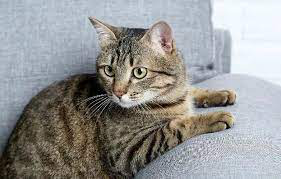

In [3]:
image_path = Path('images/cat.jpg')
image = Image.open(image_path)

from IPython.display import display

# show the image
display(image)


# 4. 实例化模型

In [11]:
# 实例化Pytorch预训练resnet模型
model = models.resnet50(pretrained=True)
model.to(device)

# check the model to see if it is on GPU
next(model.parameters()).device

device(type='cuda', index=0)

# 5. 图像预处理

In [16]:
# 设置图像预处理方法
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# 对图像进行预处理
input_tensor = preprocess(image)  # shape(3,224,224)
input_tensor = input_tensor.to(device)
input_batch = input_tensor.unsqueeze(0)  # shape(1,3,224,224)

device(type='cuda', index=0)

# 6. 模型推理

In [17]:
# 将模型设置为评估模式
model.eval()

# 推理
with torch.no_grad():
    output = model(input_batch) # shape (1,1000)

# 7. 结果后处理

In [26]:
# 读取标签
categories = pd.read_csv("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt",header=None)

# 计算概率值,得到1000分类的预测置信度,数值范围[0,1]
probabilities = F.softmax(output[0], dim=0) # shape (1000)

# 计算top5分类的预测置信度
top5_prob, top5_id = torch.topk(probabilities, 5) # shape (5)

# 将top5分类的预测置信度转换为numpy格式
top5_prob = top5_prob.cpu().numpy()

# 将top5分类的预测id转换为numpy格式
top5_id = top5_id.cpu().numpy()

# 将top5分类的预测id转换为标签
top5_label = categories.iloc[top5_id][0].values # numpy.ndarray shape(5)

# 打印top5分类的预测置信度和标签
for i in range(5):
    print("Top {}：{}，置信度：{:.2f}%".format(i+1, top5_label[i], top5_prob[i]*100))

Top 1：tabby，置信度：51.10%
Top 2：Egyptian cat，置信度：38.75%
Top 3：tiger cat，置信度：9.72%
Top 4：lynx，置信度：0.22%
Top 5：tiger，置信度：0.02%
